In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
#df = pd.read_csv('/home/eduardo/Graph-creation-with-html/Graph-creation-with-html/resultados/est-dir - parliament_data_by_year.csv')
df = pd.read_csv('est-dir - parliament_data_by_year.csv')

# Clean data - handle missing/empty Tipo values
df['Tipo'] = df['Tipo'].fillna('Unknown')
df['Tipo'] = df['Tipo'].str.strip()

# Standardize case for consistent grouping
df['Tipo'] = df['Tipo'].str.upper()
df['Fonte'] = df['Fonte'].str.title()  # Capitalize first letter

# Convert Ano to datetime for better plotting
df['Ano'] = pd.to_datetime(df['Ano'], format='%Y').dt.year

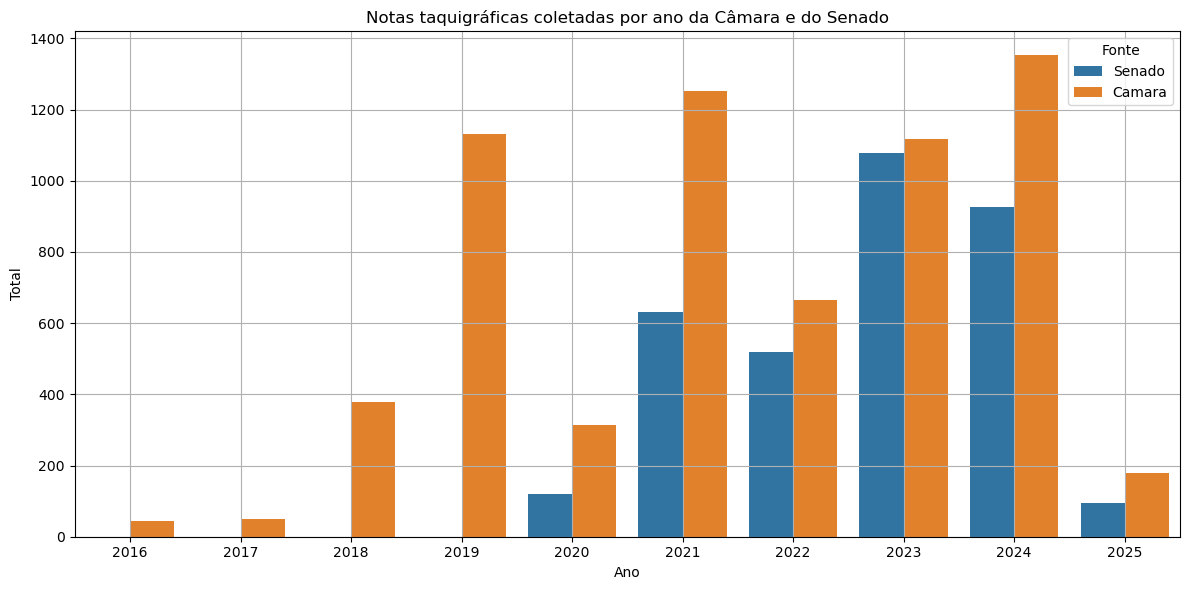

In [19]:
# Load the data
#df = pd.read_csv('est-dir - parliament_data_by_Ano.csv')
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Ano', y='Contador', hue='Fonte', 
             estimator='sum', errorbar=None)
plt.title('Notas taquigráficas coletadas por ano da Câmara e do Senado')
plt.ylabel('Total')
plt.xlabel('Ano')
plt.grid(True)
plt.tight_layout()
plt.savefig('Tabela_tipo_ano.png')
plt.show()

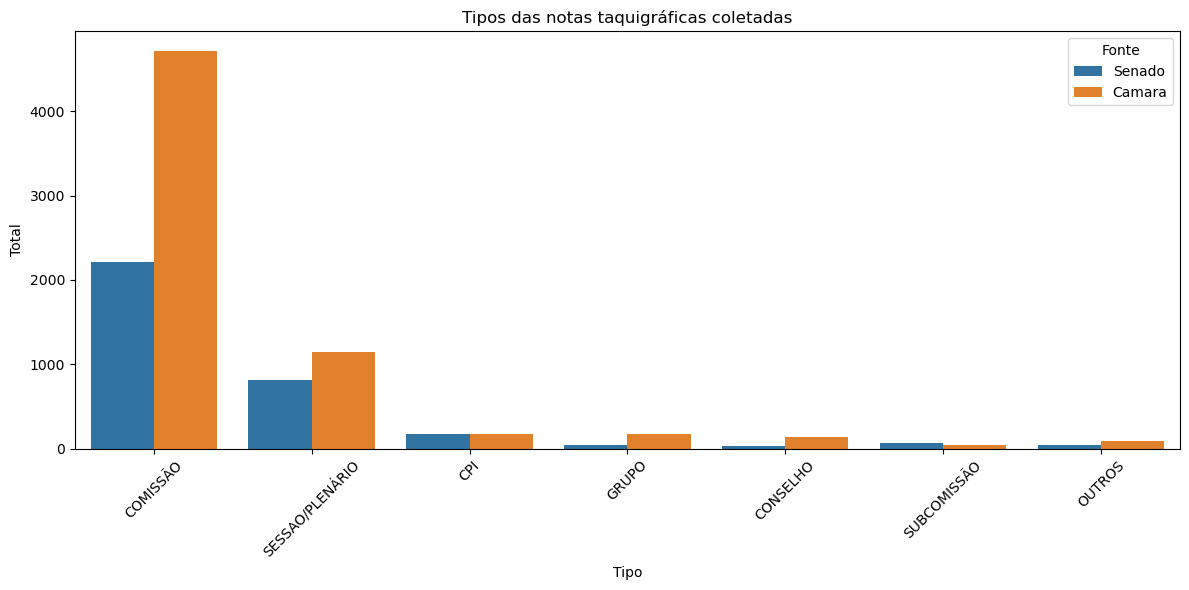

In [20]:
# Get top 10 activity types
tipo_Contadors = df.groupby('Tipo')['Contador'].sum().sort_values(ascending=False)

# Define threshold for considering a category as "small"
threshold = 6  # Keep top 6 categories, group the rest as "Outros"
top_categories = tipo_Contadors.head(threshold).index

# Create a new column for grouped categories
df['Tipo_Grouped'] = df['Tipo'].where(df['Tipo'].isin(top_categories), 'OUTROS')

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, 
                x='Tipo_Grouped', 
                y='Contador', 
                hue='Fonte', 
                estimator='sum', 
                errorbar=None,
                order=list(top_categories) + ['OUTROS'])

plt.title('Tipos das notas taquigráficas coletadas')
plt.xticks(rotation=45)
plt.ylabel('Total')
plt.xlabel('Tipo')

# Proper legend handling
plt.legend(title='Fonte')

plt.tight_layout()
plt.savefig('dados_por_ano.png', bbox_inches='tight')  # bbox_inches preserves legend
plt.show()